In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
rawdata = pd.read_csv("Admission_Predict_Ver1.1.csv")

## Data
- GRE Score : 대학원 입시 시험 점수
- TOEFL Score : 토플 점수
- University Rating : 대학교 등급
- SOP : 자기소개서 점수
- LOR : 추천서 점수
- CGPA : 학부 학점
- Research : 연구경험여부
- Chance of admit : 합격확률

In [80]:
rawdata.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [81]:
rawdata.shape

(500, 9)

# 전처리, 데이터 탐색

In [82]:
rawdata.isnull().sum() #결측치 확인

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [83]:
rawdata = rawdata.drop(["Serial No."], axis = 1) # 필요없는거 삭제

In [84]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [85]:
rawdata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Figure size 360x360 with 0 Axes>

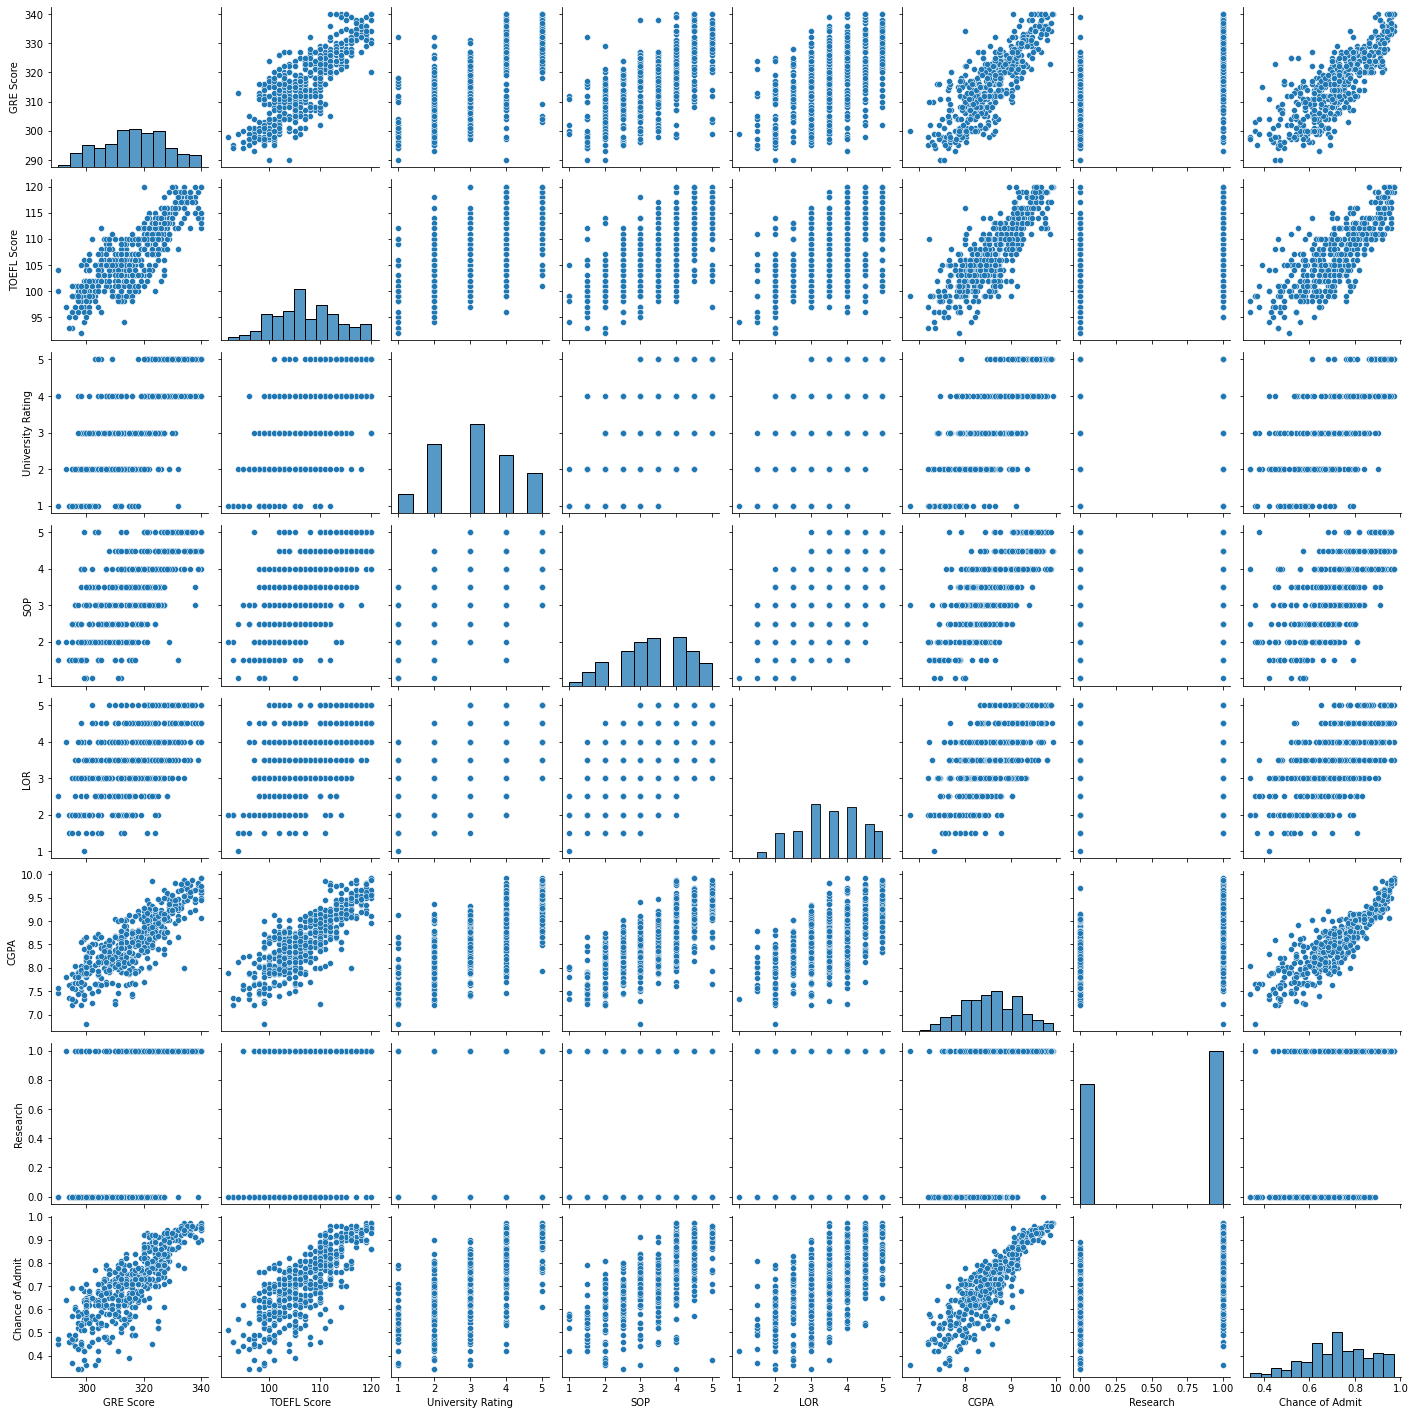

In [86]:
plt.figure(figsize = (5,5))
sns.pairplot(rawdata)
plt.show()

# 범주형(이산형) 데이터
- University Rating, SOP, LOR, Research

In [87]:
from scipy import stats

In [88]:
rawdata["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

<AxesSubplot:>

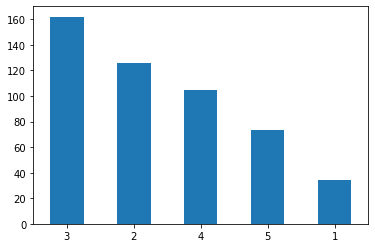

In [89]:
rawdata["University Rating"].value_counts().plot(kind = "bar", rot = 0)

<AxesSubplot:>

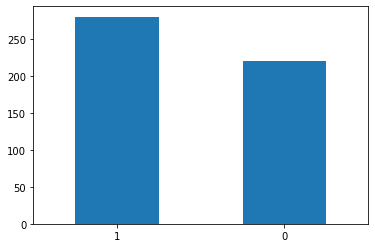

In [90]:
rawdata["Research"].value_counts().plot(kind= "bar", rot = 0)

In [91]:
cross = pd.crosstab(rawdata["University Rating"], rawdata["Research"])
chi2 = stats.chi2_contingency(cross)
print(chi2)

(96.90000948490646, 4.4936229585994394e-20, 4, array([[14.96, 19.04],
       [55.44, 70.56],
       [71.28, 90.72],
       [46.2 , 58.8 ],
       [32.12, 40.88]]))


In [92]:
def category(feature1, feature2):
    cross = pd.crosstab(rawdata[feature1], rawdata[feature2])
    chi2 = stats.chi2_contingency(cross)
    print(chi2)
    
    plt.subplot(1, 2, 1)
    sns.countplot(rawdata[feature1])
    plt.subplot(1, 2, 2)
    sns.countplot(rawdata[feature2])
    
    return cross

(96.90000948490646, 4.4936229585994394e-20, 4, array([[14.96, 19.04],
       [55.44, 70.56],
       [71.28, 90.72],
       [46.2 , 58.8 ],
       [32.12, 40.88]]))


C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Research,0,1
University Rating,,
1,24,10
2,89,37
3,75,87
4,23,82
5,9,64


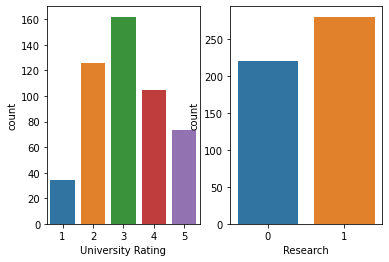

In [93]:
category("University Rating", "Research")

(440.72270292558215, 1.2187954249518449e-57, 64, array([[1.2000e-02, 1.3200e-01, 5.5200e-01, 6.0000e-01, 1.1880e+00,
        1.0320e+00, 1.1280e+00, 7.5600e-01, 6.0000e-01],
       [5.0000e-02, 5.5000e-01, 2.3000e+00, 2.5000e+00, 4.9500e+00,
        4.3000e+00, 4.7000e+00, 3.1500e+00, 2.5000e+00],
       [8.6000e-02, 9.4600e-01, 3.9560e+00, 4.3000e+00, 8.5140e+00,
        7.3960e+00, 8.0840e+00, 5.4180e+00, 4.3000e+00],
       [1.2800e-01, 1.4080e+00, 5.8880e+00, 6.4000e+00, 1.2672e+01,
        1.1008e+01, 1.2032e+01, 8.0640e+00, 6.4000e+00],
       [1.6000e-01, 1.7600e+00, 7.3600e+00, 8.0000e+00, 1.5840e+01,
        1.3760e+01, 1.5040e+01, 1.0080e+01, 8.0000e+00],
       [1.7600e-01, 1.9360e+00, 8.0960e+00, 8.8000e+00, 1.7424e+01,
        1.5136e+01, 1.6544e+01, 1.1088e+01, 8.8000e+00],
       [1.7800e-01, 1.9580e+00, 8.1880e+00, 8.9000e+00, 1.7622e+01,
        1.5308e+01, 1.6732e+01, 1.1214e+01, 8.9000e+00],
       [1.2600e-01, 1.3860e+00, 5.7960e+00, 6.3000e+00, 1.2474e+01,
        

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LOR,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
SOP,,,,,,,,,
1.0,1,1,2,2,0,0,0,0,0
1.5,0,1,13,4,4,2,1,0,0
2.0,0,3,6,16,9,4,4,1,0
2.5,0,4,13,7,19,9,9,3,0
3.0,0,2,8,9,23,23,9,4,2
3.5,0,0,3,8,30,16,22,4,5
4.0,0,0,1,4,10,20,19,21,14
4.5,0,0,0,0,3,9,24,18,9
5.0,0,0,0,0,1,3,6,12,20


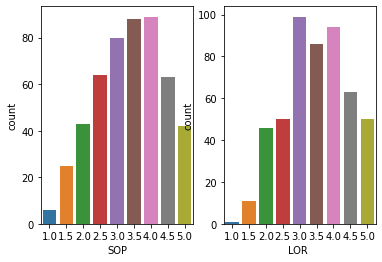

In [94]:
category("SOP", "LOR ")

In [95]:
rawdata.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [96]:
rawdata.columns =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
# 컬럼값 띄어쓰기 변경

In [97]:
rawdata.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [98]:
rawdata.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 연속형 데이터
 - GRE Scorem TOEFL Score, CGPA, Chance of Admit

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


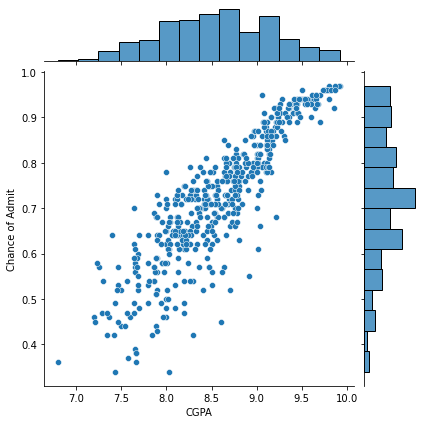

In [99]:
sns.jointplot(rawdata["CGPA"], rawdata["Chance of Admit"])

In [100]:
corr = stats.pearsonr(rawdata["CGPA"], rawdata["Chance of Admit"]) #상관관계 분석

In [101]:
corr # 0.88이면 매우 높은 상관관계를 가짐

(0.8824125749045743, 3.396544858710999e-165)

In [102]:
def continuous(feature1, feature2):
    corr = stats.pearsonr(rawdata[feature1], rawdata[feature2])
    sns.jointplot(rawdata[feature1], rawdata[feature2])
    return corr

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.8824125749045743, 3.396544858710999e-165)

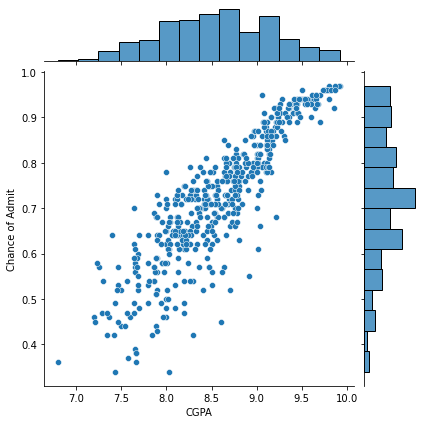

In [103]:
continuous("CGPA", "Chance of Admit")

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.8103506354632598, 1.0884036862478758e-117)

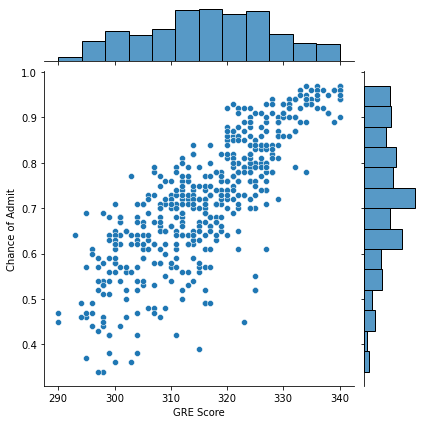

In [104]:
continuous("GRE Score", "Chance of Admit")

<AxesSubplot:>

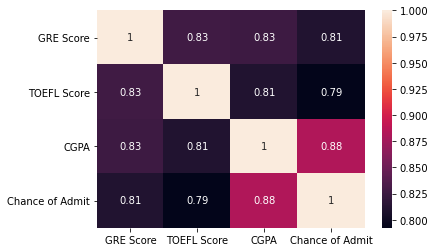

In [105]:
df = rawdata[["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit"]]
sns.heatmap(df.corr("pearson"), annot = True) #상관계수값 같이 출력되도록

In [106]:
rawdata.groupby("University Rating")[["Chance of Admit"]].mean()

,Chance of Admit
University Rating,
1,0.562059
2,0.626111
3,0.702901
4,0.801619
5,0.888082


In [107]:
value1 = rawdata[rawdata["University Rating"] == 1]["Chance of Admit"].values
value2 = rawdata[rawdata["University Rating"] == 2]["Chance of Admit"].values
value3 = rawdata[rawdata["University Rating"] == 3]["Chance of Admit"].values
value4 = rawdata[rawdata["University Rating"] == 4]["Chance of Admit"].values
value5 = rawdata[rawdata["University Rating"] == 5]["Chance of Admit"].values

In [108]:
stats.f_oneway(value1, value2, value3, value4, value5)

F_onewayResult(statistic=114.00804341400004, pvalue=7.753395328023128e-69)

In [109]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [110]:
# 사후검정
# endog = 종속변수 , groups = 독립변수
tukey = pairwise_tukeyhsd(endog = rawdata["Chance of Admit"], groups = rawdata["University Rating"],
                         alpha = 0.05)
tukey.summary()
# 모든 그룹간에는 평균에 차이가 있다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0641,0.0111,0.01,0.1181,True
1,3,0.1408,0.001,0.088,0.1936,True
1,4,0.2396,0.001,0.1843,0.2948,True
1,5,0.326,0.001,0.2679,0.3841,True
2,3,0.0768,0.001,0.0435,0.11,True
2,4,0.1755,0.001,0.1385,0.2125,True
2,5,0.262,0.001,0.2208,0.3031,True
3,4,0.0987,0.001,0.0636,0.1338,True
3,5,0.1852,0.001,0.1457,0.2246,True
4,5,0.0865,0.001,0.0438,0.1291,True


C:\Users\201710567\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


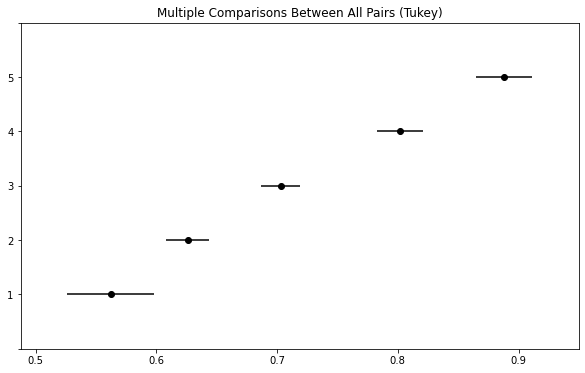

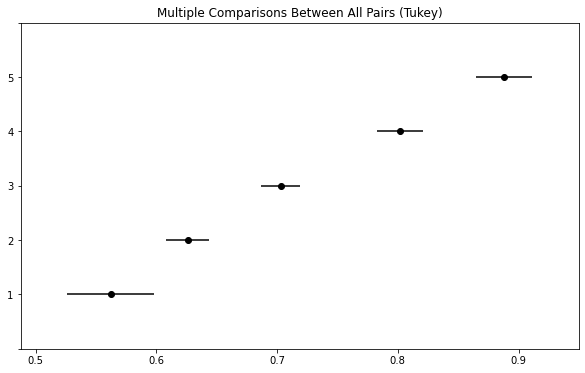

In [111]:
tukey.plot_simultaneous()

In [112]:
# 종속변수 먼저
tuk = pairwise_tukeyhsd(rawdata["Chance of Admit"], rawdata["SOP"],
                        alpha = 0.05)
tuk.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,1.5,0.0081,0.9,-0.1377,0.1538,False
1.0,2.0,0.0512,0.9,-0.0885,0.1909,False
1.0,2.5,0.107,0.2674,-0.0299,0.2439,False
1.0,3.0,0.1402,0.0369,0.0045,0.2759,True
1.0,3.5,0.1737,0.0023,0.0384,0.309,True
1.0,4.0,0.2445,0.001,0.1092,0.3797,True
1.0,4.5,0.3117,0.001,0.1747,0.4486,True
1.0,5.0,0.3467,0.001,0.2067,0.4866,True
1.5,2.0,0.0431,0.7389,-0.0375,0.1238,False
1.5,2.5,0.0989,0.0017,0.0233,0.1745,True


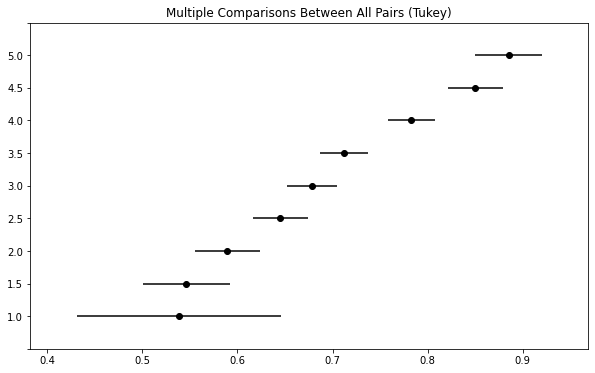

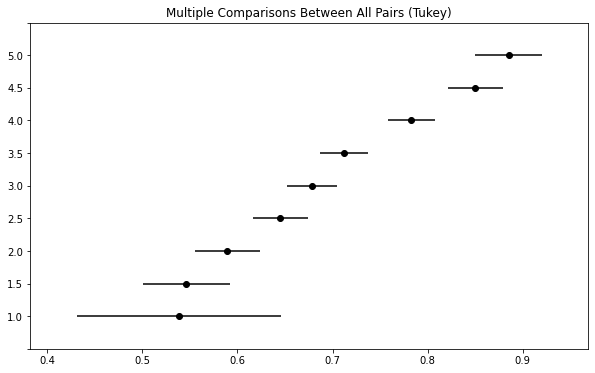

In [113]:
tuk.plot_simultaneous()

# Modeling

### Linear Regression 선형 회귀분석
- statsmodels
- sklearn

In [114]:
import statsmodels.formula.api as smf

In [115]:
df = rawdata.copy()
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [116]:
df.columns = ["GRE", "TOEFL", "UNR", "SOP", "LOR", "CGPA", "RSCH", "CoA"]

In [117]:
df.head()

,GRE,TOEFL,UNR,SOP,LOR,CGPA,RSCH,CoA
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [118]:
# ols 는 잔차의 제곱합을 최소화 하는 방법으로 회귀 식을 만듬
# 앞이 종속
reg = smf.ols(formula = "CoA ~ CGPA", data = df).fit()

In [119]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CoA   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1752.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          3.40e-165
Time:                        23:36:19   Log-Likelihood:                 647.04
No. Observations:                 500   AIC:                            -1290.
Df Residuals:                     498   BIC:                            -1282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0443      0.042    -24.689      0.000      -1.127      -0.961
CGPA           0.2059      0.005     41.855      0.000       0.196       0.216
==============================================================================
Omnibus:                       77.451   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.520
Skew:                          -0.898   Prob(JB):                     6.84e-32
Kurtosis:                       4.915   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 해석법
- Intercept 는 회귀식의 절편
- CGPA의 coef이 0.2059이면 CGPA가 1단위 증가할 때 합격확률이 coef 만큼 증가한다.

$Y(CoA) = -1.0443 + 0.2059* X(CGPA)$

In [126]:
df["predict"] = pd.DataFrame({"predict" : reg.predict()})
df.head()

,GRE,TOEFL,UNR,SOP,LOR,CGPA,RSCH,CoA,predict
0,337,118,4,4.5,4.5,9.65,1,0.92,0.942809
1,324,107,4,4.0,4.5,8.87,1,0.76,0.782190
2,316,104,3,3.0,3.5,8.00,1,0.72,0.603039
3,322,110,3,3.5,2.5,8.67,1,0.80,0.741006
4,314,103,2,2.0,3.0,8.21,0,0.65,0.646282


In [127]:
from sklearn.metrics import mean_squared_error # 잔차 제곱의 합 , 평가기준

MSE = mean_squared_error(df["CoA"], df["predict"])
RMSE = np.sqrt(MSE)

print("MSE :", MSE, "RMSE :", RMSE) # 낮을수록 좋은 모델

MSE : 0.004400570156519552 RMSE : 0.06633679338436213


In [128]:
from sklearn.metrics import r2_score

In [129]:
r2_score(df["CoA"], df["predict"]) # r2_score 는 높을수록 좋은 모델 = 설명력
# r-squared 값

0.778651952349721

In [130]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CoA   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1752.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          3.40e-165
Time:                        23:36:40   Log-Likelihood:                 647.04
No. Observations:                 500   AIC:                            -1290.
Df Residuals:                     498   BIC:                            -1282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0443      0.042    -24.689      0.000      -1.127      -0.961
CGPA           0.2059      0.005     41.855      0.000       0.196       0.216
==============================================================================
Omnibus:                       77.451   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.520
Skew:                          -0.898   Prob(JB):                     6.84e-32
Kurtosis:                       4.915   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
df.head()

,GRE,TOEFL,UNR,SOP,LOR,CGPA,RSCH,CoA,predict
0,337,118,4,4.5,4.5,9.65,1,0.92,0.942809
1,324,107,4,4.0,4.5,8.87,1,0.76,0.782190
2,316,104,3,3.0,3.5,8.00,1,0.72,0.603039
3,322,110,3,3.5,2.5,8.67,1,0.80,0.741006
4,314,103,2,2.0,3.0,8.21,0,0.65,0.646282


In [132]:
reg2 = smf.ols(formula = "CoA ~ GRE + TOEFL + C(LOR) + C(SOP) + CGPA + C(RSCH) + C(UNR)", data = df ).fit()

In [133]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CoA   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     94.37
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          1.00e-163
Time:                        23:36:41   Log-Likelihood:                 708.11
No. Observations:                 500   AIC:                            -1366.
Df Residuals:                     475   BIC:                            -1261.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2593      0.124    -10.175      0.000      -1.502      -1.016
C(LOR)[T.1.5]     0.0178      0.068      0.262      0.793      -0.116       0.151
C(LOR)[T.2.0]     0.0516      0.067      0.774      0.439      -0.079       0.182
C(LOR)[T.2.5]     0.0700      0.067      1.049      0.295      -0.061       0.201
C(LOR)[T.3.0]     0.0626      0.067      0.936      0.350      -0.069       0.194
C(LOR)[T.3.5]     0.0766      0.067      1.141      0.254      -0.055       0.208
C(LOR)[T.4.0]     0.0850      0.067      1.266      0.206      -0.047       0.217
C(LOR)[T.4.5]     0.0897      0.067      1.329      0.184      -0.043       0.222
C(LOR)[T.5.0]     0.0993      0.068      1.465      0.144      -0.034       0.232
C(SOP)[T.1.5]    -0.0085      0.030     -0.283      0.778      -0.068       0.051
C(SOP)[T.2.0]    -0.0067      0.030     -0.225      0.822      -0.065       0.052
C(SOP)[T.2.5]     0.0160      0.030      0.533      0.594      -0.043       0.075
C(SOP)[T.3.0]     0.0078      0.030      0.260      0.795      -0.051       0.067
C(SOP)[T.3.5]    -0.0008      0.030     -0.028      0.978      -0.061       0.059
C(SOP)[T.4.0]     0.0034      0.031      0.110      0.912      -0.057       0.064
C(SOP)[T.4.5]     0.0090      0.032      0.283      0.777      -0.053       0.071
C(SOP)[T.5.0]     0.0152      0.033      0.467      0.641      -0.049       0.079
C(RSCH)[T.1]      0.0245      0.007      3.633      0.000       0.011       0.038
C(UNR)[T.2]      -0.0179      0.013     -1.342      0.180      -0.044       0.008
C(UNR)[T.3]      -0.0092      0.014     -0.647      0.518      -0.037       0.019
C(UNR)[T.4]      -0.0092      0.016     -0.579      0.563      -0.041       0.022
C(UNR)[T.5]       0.0098      0.018      0.548      0.584      -0.025       0.045
GRE               0.0018      0.001      3.540      0.000       0.001       0.003
TOEFL             0.0029      0.001      3.277      0.001       0.001       0.005
CGPA              0.1183      0.010     11.972      0.000       0.099       0.138
==============================================================================
Omnibus:                      106.370   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.362
Skew:                          -1.090   Prob(JB):                     4.31e-55
Kurtosis:                       5.695   Cond. No.                     2.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
df["predict2"] = pd.DataFrame({"predict2" : reg2.predict()})
df.head()

,GRE,TOEFL,UNR,SOP,LOR,CGPA,RSCH,CoA,predict,predict2
0,337,118,4,4.5,4.5,9.65,1,0.92,0.942809,0.945198
1,324,107,4,4.0,4.5,8.87,1,0.76,0.782190,0.792034
2,316,104,3,3.0,3.5,8.00,1,0.72,0.603039,0.657316
3,322,110,3,3.5,2.5,8.67,1,0.80,0.741006,0.749522
4,314,103,2,2.0,3.0,8.21,0,0.65,0.646282,0.614104


In [135]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(df["CoA"], df["predict2"])
RMSE2 = np.sqrt(MSE2)
r2_score2 = r2_score(df["CoA"], df["predict2"])

print("MSE :", MSE2, "RMSE :", RMSE2, "r2 :", r2_score2) # 낮을수록 좋은 모델 ,r2_score는 높을수록 좋은 모델

MSE : 0.0034467616461393157 RMSE : 0.05870912745169456 r2 : 0.8266283836064983


In [136]:
print(MSE, RMSE, r2_score)

0.004400570156519552 0.06633679338436213 <function r2_score at 0x000001DAC0F8C310>


- train / test

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [138]:
rawdata.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [139]:
rawdata.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [140]:
x = rawdata.drop("Chance of Admit", axis=1)
y = rawdata["Chance of Admit"]

In [141]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [142]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [143]:
# 독립변수, 종속변수를 train과 test로 나눠줌
# test_size = 0.3은 30%의 데이터로 train 시키고
# 나머지 70%의 데이터로 검증을 함
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 103)

In [144]:
# train 데이터로 fit, 그 후 x_test로 예측
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [145]:
from sklearn.metrics import r2_score, mean_squared_error

In [146]:
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('lr_r2: ', lr_r2, '\nlrmse: ', lr_rmse)

lr_r2:  0.8361085460769917 
lrmse:  0.05553273181040573


In [147]:
print(r2_score2, RMSE2)

0.8266283836064983 0.05870912745169456


In [148]:
lr.coef_

array([ 0.00219834,  0.00203879,  0.01009379, -0.00196772,  0.01599634,
        0.12252142,  0.01639021])

In [149]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

<AxesSubplot:>

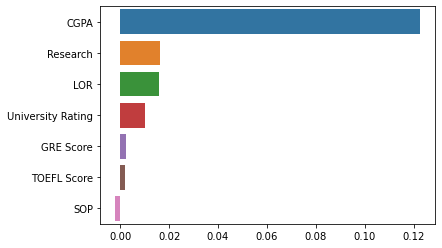

In [150]:
coef = pd.Series(lr.coef_, index = x.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)

- Example
    - GRE : 320
    - TOEFL : 115
    - University Rating : 3
    - SOP : 4.0
    - LOR : 3.5
    -CGPA : 4.0
    - Research : 1

In [151]:
ex = pd.DataFrame([320, 115, 3, 4.0, 3.5, 4.0, 1]).T

In [152]:
ex.head()

,0,1,2,3,4,5,6
0,320.0,115.0,3.0,4.0,3.5,4.0,1.0


In [153]:
lr.predict(ex)

array([0.18612181])